In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r"C:\Users\KAREN J FERNANDES\anaconda3\Files\AB Testing\recommendation_data.csv")
df.head()

,customer_id,Recommendation_name,Recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,7/2/2021,With phone,0.0
1,2.0,Recommend_screenguard,7/3/2021,With phone,0.0
2,3.0,Recommend_screenguard,7/4/2021,With cover,1.0
3,4.0,Recommend_screenguard,7/5/2021,With phone,0.0
4,5.0,Recommend_screenguard,7/6/2021,With cover,1.0


### Data Cleaning

In [3]:
# headers to lower case
df.columns = df.columns.str.lower()
df.head()

,customer_id,recommendation_name,recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,7/2/2021,With phone,0.0
1,2.0,Recommend_screenguard,7/3/2021,With phone,0.0
2,3.0,Recommend_screenguard,7/4/2021,With cover,1.0
3,4.0,Recommend_screenguard,7/5/2021,With phone,0.0
4,5.0,Recommend_screenguard,7/6/2021,With cover,1.0


In [4]:
#total rows and columns
df.shape

(868, 5)

In [5]:
# checking for total sum of duplicates
df.duplicated().sum()

156

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
# checking for total sum of nulls
df.isnull().sum()

customer_id            0
recommendation_name    0
recommendation_date    0
suggestion_type        0
purchase_flag          0
dtype: int64

In [8]:
df.shape

(711, 5)

In [9]:
# checking data types
df.dtypes

customer_id            float64
recommendation_name     object
recommendation_date     object
suggestion_type         object
purchase_flag          float64
dtype: object

In [10]:
df['recommendation_date'] = pd.to_datetime(df['recommendation_date'])

In [11]:
df.head()

,customer_id,recommendation_name,recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,2021-07-02,With phone,0.0
1,2.0,Recommend_screenguard,2021-07-03,With phone,0.0
2,3.0,Recommend_screenguard,2021-07-04,With cover,1.0
3,4.0,Recommend_screenguard,2021-07-05,With phone,0.0
4,5.0,Recommend_screenguard,2021-07-06,With cover,1.0


In [12]:
# checking data types
df.dtypes

customer_id                   float64
recommendation_name            object
recommendation_date    datetime64[ns]
suggestion_type                object
purchase_flag                 float64
dtype: object

### A/B Testing

In [13]:
# define control and test groups
control_group = df[df['suggestion_type'] == 'With phone']
test_group = df[df['suggestion_type'] == 'With cover']

# display the size of each group
print(f"Control group size: {len(control_group)}")
print(f"Test group size: {len(test_group)}")

Control group size: 375
Test group size: 336


In [14]:
# calculate conversion rates
control_conversion_rate = control_group['purchase_flag'].mean()
test_conversion_rate = test_group['purchase_flag'].mean()

print(f"Control group conversion rate: {control_conversion_rate:.2%}")
print(f"Test group conversion rate: {test_conversion_rate:.2%}")

Control group conversion rate: 31.20%
Test group conversion rate: 38.69%


In [15]:
# create a contingency table
contingency_table = pd.crosstab(df['suggestion_type'], df['purchase_flag'])

# perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared test statistic: 4.061579280024079
P-value: 0.04386945305215398


In [16]:
# significance level
alpha = 0.05  
if p < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in conversion rates.")

Reject the null hypothesis (H0). There is a significant difference in conversion rates.


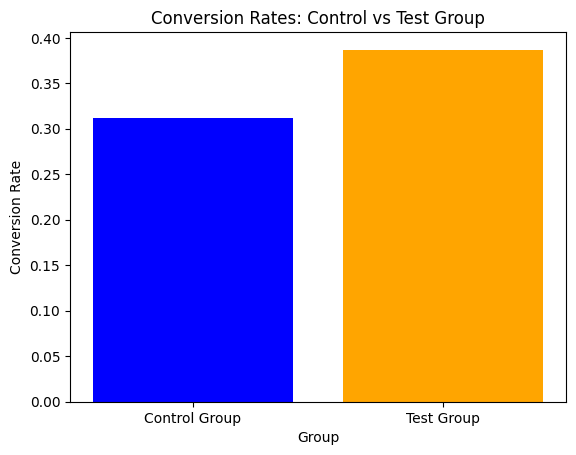

In [17]:
conversion_rates = [control_conversion_rate, test_conversion_rate]
labels = ['Control Group', 'Test Group']

plt.bar(labels, conversion_rates, color=['blue', 'orange'])
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates: Control vs Test Group')
plt.show()